# データ結合：Merge
　Pandasを用いて, データを結合する.

## Import

In [1]:
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

## Setting

In [2]:
# Path
input_path = "../input_data/"

# Figure Size
plt.rcParams["figure.figsize"] = (15.0, 10.0)

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

## Read Data

In [3]:
train = pd.read_csv(input_path + "jleague/train.csv", sep=",", header=0, quotechar="\"")
test = pd.read_csv(input_path + "jleague/test.csv", sep=",", header=0, quotechar="\"")
condition = pd.read_csv(input_path + "jleague/condition.csv", sep=",", header=0, quotechar="\"")
stadium = pd.read_csv(input_path + "jleague/stadium.csv", sep=",", header=0, quotechar="\"")

## Check Data

In [4]:
train.dtypes

id          int64
y           int64
year        int64
stage      object
match      object
gameday    object
time       object
home       object
away       object
stadium    object
tv         object
dtype: object

In [5]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ ４）／ＮＨＫ名古屋
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,スカパー／ｅ２／スカパー光（Ｊ ＳＰＯＲＴＳ １）／ＮＨＫ大阪
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,スカパー／ｅ２／スカパー光／ＮＨＫ広島
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,スカパー／ｅ２／スカパー光（スカイ・Ａ ｓｐｏｒｔｓ＋）／ＮＨＫ札幌


In [6]:
test.dtypes

id          int64
year        int64
stage      object
match      object
gameday    object
time       object
home       object
away       object
stadium    object
tv         object
dtype: object

In [7]:
test.head()

,id,year,stage,match,gameday,time,home,away,stadium,tv
0,15822,2014,Ｊ１,第１８節第１日,08/02(土),19:04,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,スカパー！／スカパー！プレミアムサービス
1,15823,2014,Ｊ１,第１８節第１日,08/02(土),18:34,鹿島アントラーズ,サンフレッチェ広島,県立カシマサッカースタジアム,スカパー！／スカパー！プレミアムサービス
2,15824,2014,Ｊ１,第１８節第１日,08/02(土),19:04,浦和レッズ,ヴィッセル神戸,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／テレ玉
3,15825,2014,Ｊ１,第１８節第１日,08/02(土),19:03,柏レイソル,川崎フロンターレ,日立柏サッカー場,スカパー！／スカパー！プレミアムサービス
4,15827,2014,Ｊ１,第１８節第１日,08/02(土),19:03,アルビレックス新潟,セレッソ大阪,デンカビッグスワンスタジアム,スカパー！／スカパー！プレミアムサービス


In [8]:
condition.dtypes

id               int64
home_score       int64
away_score       int64
weather         object
temperature    float64
humidity        object
referee         object
home_team       object
home_01         object
home_02         object
home_03         object
home_04         object
home_05         object
home_06         object
home_07         object
home_08         object
home_09         object
home_10         object
home_11         object
away_team       object
away_01         object
away_02         object
away_03         object
away_04         object
away_05         object
away_06         object
away_07         object
away_08         object
away_09         object
away_10         object
away_11         object
dtype: object

In [9]:
condition.head()

,id,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
0,13994,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,太田 吉彰,関口 訓充,ウイルソン,赤嶺 真吾,鹿島アントラーズ,曽ヶ端 準,新井場 徹,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ
1,13995,1,0,屋内,12.4,43%,西村 雄一,名古屋グランパス,楢﨑 正剛,田中 隼磨,田中 マルクス闘莉王,増川 隆洋,阿部 翔平,中村 直志,ダニルソン,藤本 淳吾,金崎 夢生,ケネディ,玉田 圭司,清水エスパルス,林 彰洋,吉田 豊,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀
2,13996,2,3,晴一時雨,11.3,41%,高山 啓義,ガンバ大阪,藤ヶ谷 陽介,加地 亮,中澤 聡太,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,佐々木 勇人,二川 孝広,ラフィーニャ,パウリーニョ,ヴィッセル神戸,徳重 健太,近藤 岳登,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人
3,13997,1,0,曇一時雨のち晴,11.4,52%,松尾 一,サンフレッチェ広島,西川 周作,森脇 良太,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,浦和レッズ,加藤 順大,濱田 水輝,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也
4,13998,0,0,屋内,22.5,32%,廣瀬 格,コンサドーレ札幌,李 昊乗,高木 純平,ジェイド ノース,奈良 竜樹,岩沼 俊介,河合 竜二,山本 真希,近藤 祐介,内村 圭宏,岡本 賢明,前田 俊介,ジュビロ磐田,川口 能活,駒野 友一,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一


In [10]:
stadium.dtypes

name       object
address    object
capa        int64
dtype: object

In [11]:
stadium.head()

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000
1,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,フクダ電子アリーナ,千葉県千葉市中央区川崎町1-20,18500
3,日立柏サッカー場,千葉県柏市日立台1-2-50,15349
4,ニンジニアスタジアム,愛媛県松山市上野町乙46,15576


## Overview(trainのみ)

In [12]:
# 欠損有無
train.isnull().any()

id         False
y          False
year       False
stage      False
match      False
gameday    False
time       False
home       False
away       False
stadium    False
tv         False
dtype: bool

In [13]:
train["stage"].value_counts()

Ｊ２    1046
Ｊ１     675
Name: stage, dtype: int64

In [14]:
train["home"].value_counts()

ロアッソ熊本         51
愛媛ＦＣ           51
栃木ＳＣ           50
松本山雅ＦＣ         49
モンテディオ山形       49
ＦＣ岐阜           48
徳島ヴォルティス       48
アビスパ福岡         48
水戸ホーリーホック      47
ファジアーノ岡山       47
ジェフユナイテッド千葉    47
コンサドーレ札幌       46
湘南ベルマーレ        46
京都サンガF.C.      46
カターレ富山         45
横浜ＦＣ           45
東京ヴェルディ        44
ギラヴァンツ北九州      43
ジュビロ磐田         43
大分トリニータ        43
ヴァンフォーレ甲府      42
柏レイソル          41
ヴィッセル神戸        41
浦和レッズ          40
ガンバ大阪          40
セレッソ大阪         39
清水エスパルス        39
川崎フロンターレ       39
ベガルタ仙台         39
ＦＣ東京           38
アルビレックス新潟      37
サンフレッチェ広島      37
大宮アルディージャ      36
横浜Ｆ・マリノス       36
サガン鳥栖          36
鹿島アントラーズ       36
名古屋グランパス       35
ガイナーレ鳥取        35
ザスパクサツ群馬       28
Ｖ・ファーレン長崎      27
ＦＣ町田ゼルビア       18
ザスパ草津          17
カマタマーレ讃岐        9
Name: home, dtype: int64

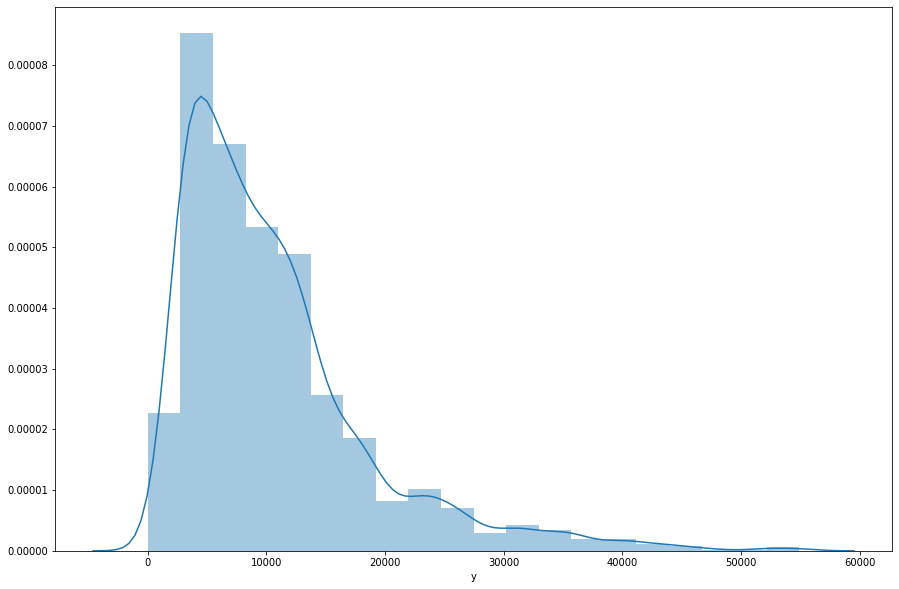

In [15]:
sns.distplot(
    train["y"],    # データ
    kde = True,      # 近似密度関数の表示有無
    bins = 20        # 変数の刻み数
) 

In [16]:
train["y"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     2607.0
0.25     4750.0
0.50     8650.0
0.75    13431.0
0.95    26897.0
Name: y, dtype: float64

## データ結合
### train, testとcondition, stadium

In [17]:
# 結合前の行, 列数
print(train.shape)
print(test.shape)

(1721, 11)
(313, 10)


In [18]:
# condition
train_new = pd.merge(train, condition, how="inner", on="id")
test_new = pd.merge(test, condition, how="inner", on="id")

# stadium
train_new = pd.merge(train_new, stadium, how="inner", left_on="stadium", right_on="name")
test_new = pd.merge(test_new, stadium, how="inner", left_on="stadium", right_on="name")

In [19]:
# 結合後の行, 列数
print(train_new.shape)
print(test_new.shape)

(1721, 44)
(313, 43)


## Output

In [20]:
# Train
train_new.to_csv(
    "../output_data/train_new_20200217.csv",  sep=",", index=False, header=True)

# Test
test_new.to_csv(
    "../output_data/test_new_20200217.csv",  sep=",", index=False, header=True)